# Tarea 1

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]$


Para facilitar las cosas, conviene definir una función que simplifique el tomar los iterados de una función:

In [1]:
"""
    iteraciones(f::Function, número_iteraciones::Int, x0)

Genera un array unidimensional de tamaño `1 + número_iteraciones` que en la entrada ``i + 1`` tiene al elemento proveniente de iterar `x0` ``ì`` veces con la función `f`. En el caso de ```i = 1``, el valor en el array es igual a la condición inicial usada.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

# Ejemplo
```julia-repl

julia> iteraciones(x->x^2, 5, 2)
6-element Array{Int64,1}:
          2
          4
         16
        256
      65536
 4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iteraciones(v, 2, [1, 3])
3-element Array{Array{Int64,1},1}:
 [1, 3]  
 [-2, 3] 
 [-5, -6]
```
"""
function iteraciones(f::Function, número_iteraciones::Int, x0)
    
    valor = x0
    
    iterados = [x0]
    
    for i in 1:número_iteraciones
        
        valor = f(valor)
        push!(iterados, valor)
    end
    
    return(iterados)
end

iteraciones (generic function with 1 method)

Así como eventualmente el valor de la iteración correspondiente:

In [2]:
"""
    iterar(f::Function, número_iteraciones::Int, x0)

Devuelve el resultado de iterar `número_iteraciones` veces la función `f` con condición inicial `x0`.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

# Ejemplo
```julia-repl

julia> iterar(x->x^2, 5, 2)
4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iterar(v, 2, [1, 3])
2-element Array{Int64,1}:
 -5
 -6
```
"""
function iterar(f::Function, número_iteraciones::Int, x0)
    
    iterados = iteraciones(f, número_iteraciones, x0)
    valor = last(iterados)
    
    return(valor)
end

iterar (generic function with 1 method)

Para la función $ F(x) = x^2 - 2 $, consideremos el resultado de usar las condiciones iniciales dadas iterando $F$ 1000 veces:

In [3]:
F(x) = x^2 - 2

x0 = 0
número_iteraciones = 1000

iteraciones_F_1 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Int64,1}:
  0
 -2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  ⋮
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2

Entonces, $x_0 = 0$ es un punto eventualmente periódico, más aún, la órbita a la que converge es de periodo uno, lo que indica que la iteración converge eventualmente a un punto fijo: $x = 2$.

In [4]:
x0 = 0.1
iteraciones_F_2 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.1                
 -1.99               
  1.9601000000000002 
  1.8419920100000007 
  1.3929345649038427 
 -0.05973329789614246
 -1.9964319331224507 
  1.9857404635910454 
  1.9431651887427797 
  1.7758909507417626 
  1.1537886689264814 
 -0.6687717074568584 
 -1.5527444033052382 
  ⋮                  
 -0.3682674012305529 
 -1.8643791211908949 
  1.4759095075325335 
  0.17830887442492527
 -1.9682059453013163 
  1.8738346431194484 
  1.5112562697545906 
  0.28389551287255976
 -1.9194033377708262 
  1.6841091730457882 
  0.8362237067369684 
 -1.3007299122910845 

No se observa ningún tipo de patrón evidente, aunque una mejor forma de investigar esto es realizando una gráfica:

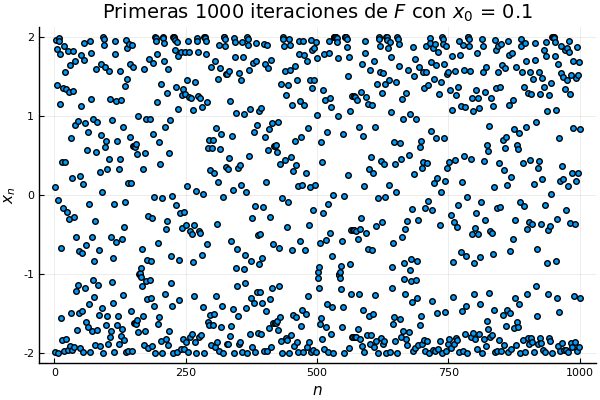

In [5]:
using Plots
using LaTeXStrings
pyplot()

scatter(iteraciones_F_2, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

No se observa periodicidad, aunque se nota que todos los valores resultantes están en el intervalo [-2, 2].

In [6]:
x0 = 0.001
iteraciones_F_3 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.001              
 -1.999999           
  1.9999960000010004 
  1.9999840000200018 
  1.9999360003360063 
  1.999744005439982  
  1.9989760872931428 
  1.9959053975698025 
  1.9836383560482713 
  1.9348211275858884 
  1.7435327957527287 
  1.0399066098653265 
 -0.9185942427584037 
  ⋮                  
  1.996506616727705  
  1.986038670637507  
  1.944349601267596  
  1.7804953719494598 
  1.1701637695334455 
 -0.6307167524712776 
 -1.6021963781520852 
  0.5670332341636595 
 -1.6784733113539005 
  0.8172726569273281 
 -1.332065404238946  
 -0.22560175882973366

No se observa ningún tipo de patrón evidente, aunque una mejor forma de investigar esto es realizando una gráfica:

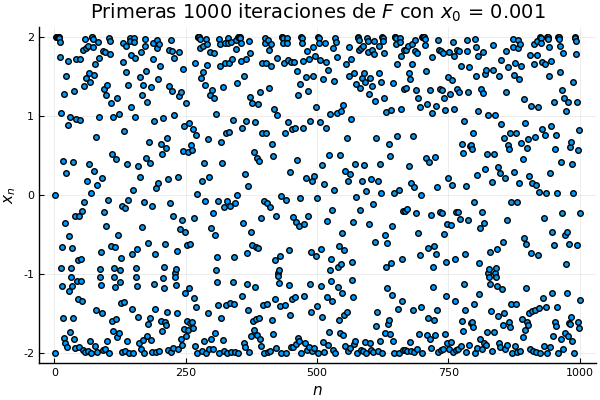

In [7]:
scatter(iteraciones_F_3, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

No se observa periodicidad, aunque se nota que todos los valores resultantes están en el intervalo [-2, 2].

Como se pudo observar en los ejemplos, existió un punto que fue eventualmente periódico y otros dos que aparentemente no tienen ningún patrón que sea evidente. Sin embargo, en todos los casos el valor de las iteraciones permanece dentro del intervalo [-2, 2], esto es por lo siguiente:

Sea $ x \in [-2, 2]$, entonces, $x^2 \in [0, 4] \implies F(x) = x^2 -2 \in [-2, 2] $. 

Esto quiere decir que todas las condiciones iniciales tomadas en el intervalo [-2, 2] son mapeadas al mismo intervalo con la función $F$. Esto, considerando los ejemplos anteriores, nos indica que hay mapeos que no son periódicos o eventualmente periódicos pero acotados.

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

## 5

- Para el mapeo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.